In [653]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import shuffle

In [654]:
df = pd.read_csv("../datasets/bank_additional/bank-additional-full.csv", sep=";")
print(list(df.columns))

['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


In [655]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [656]:
# Датасет без пропусков
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

<big>Data processing and Future engineering</big>

In [657]:
# Бинаризация
from sklearn.preprocessing import LabelEncoder

# Бинаризация нескольких столбцов
le = LabelEncoder()
df['y'] = le.fit_transform(df['y'])
df["contact"] = le.fit_transform(df["contact"])

In [658]:
# Перевод месяцев и дней в числовой формат
from sklearn.preprocessing import OrdinalEncoder

In [659]:
df["month"].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

In [660]:
# Преобразование месяцев
ord_e = OrdinalEncoder(categories = [["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"]])
df["month"] = ord_e.fit_transform(df["month"].values.reshape(-1, 1))


In [661]:
df["day_of_week"].unique()

array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

In [662]:
# Преобразование дней
ord_e = OrdinalEncoder(categories = [["mon", "tue", "wed", "thu", "fri", "sat", "sun"]])
df["day_of_week"] = ord_e.fit_transform(df["day_of_week"].values.reshape(-1, 1))

In [663]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,1,4.0,0.0,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,1,4.0,0.0,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,1,4.0,0.0,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,1,4.0,0.0,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,1,4.0,0.0,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,0,10.0,4.0,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,0,10.0,4.0,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,0,10.0,4.0,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,0,10.0,4.0,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


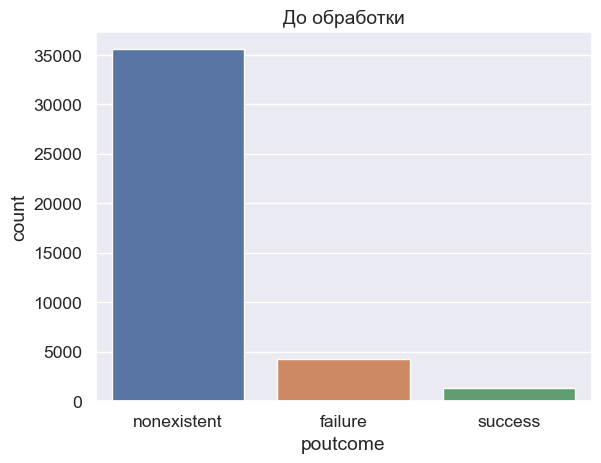

In [664]:
df["poutcome"].unique()
sns.countplot(df, x='poutcome')
plt.title("До обработки")
# Принимаю решение удалить этот столбец
df.drop(columns=["poutcome"], inplace=True)



Text(0.5, 1.0, 'После обработки')

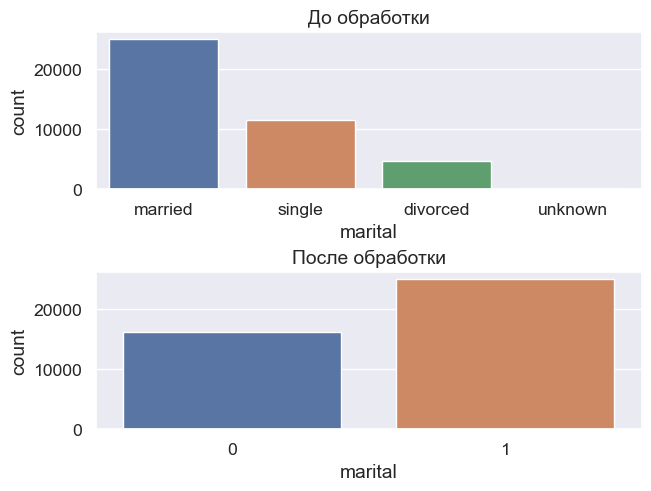

In [665]:
df['marital'].unique()
fig, axes = plt.subplots(2, constrained_layout=True)
sns.countplot(df, x='marital', ax=axes[0]).set_title('До обработки')

# Удалим значения с marital == unknown
df = df.loc[df['marital'] != "unknown"]

# Объединим single и divorced в просто single
dict_to_replace = {"married": 1, "single": 0, "divorced": 0}
df = df.replace({"marital": dict_to_replace})

sns.countplot(df, x='marital', ax=axes[1]).set_title("После обработки")



Text(0.5, 1.0, 'После обработки')

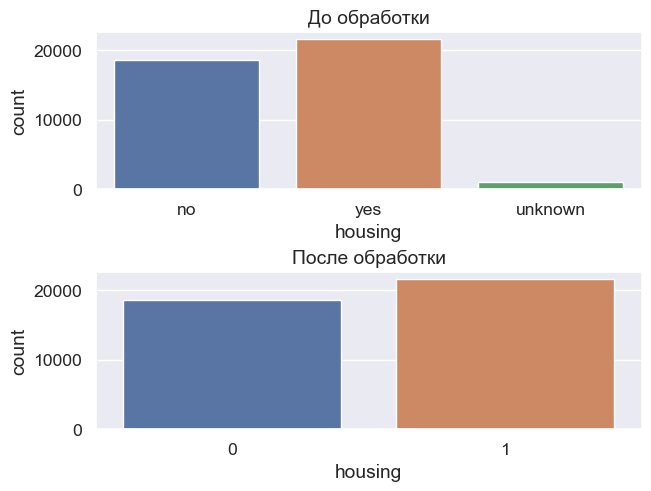

In [666]:
df['housing'].unique()
fig, axes = plt.subplots(2, constrained_layout=True)
sns.countplot(df, x='housing', ax=axes[0]).set_title('До обработки')

# Удалим значения с housing == unknown
df = df.loc[df['housing'] != "unknown"]

df['housing'] = le.fit_transform(df['housing'])
sns.countplot(df, x='housing', ax=axes[1]).set_title('После обработки')

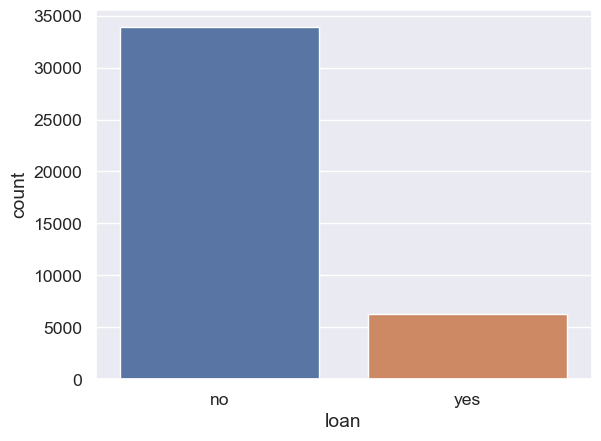

In [667]:
df['loan'].unique()
sns.countplot(df, x='loan')

df['loan'] = le.fit_transform(df['loan'])

In [668]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,1,basic.4y,no,0,0,1,4.0,0.0,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,1,high.school,unknown,0,0,1,4.0,0.0,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,1,high.school,no,1,0,1,4.0,0.0,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,1,basic.6y,no,0,0,1,4.0,0.0,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,1,high.school,no,0,1,1,4.0,0.0,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,1,professional.course,no,1,0,0,10.0,4.0,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,1,professional.course,no,0,0,0,10.0,4.0,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,1,university.degree,no,1,0,0,10.0,4.0,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,1,professional.course,no,0,0,0,10.0,4.0,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1


Text(0.5, 1.0, 'После обработки')

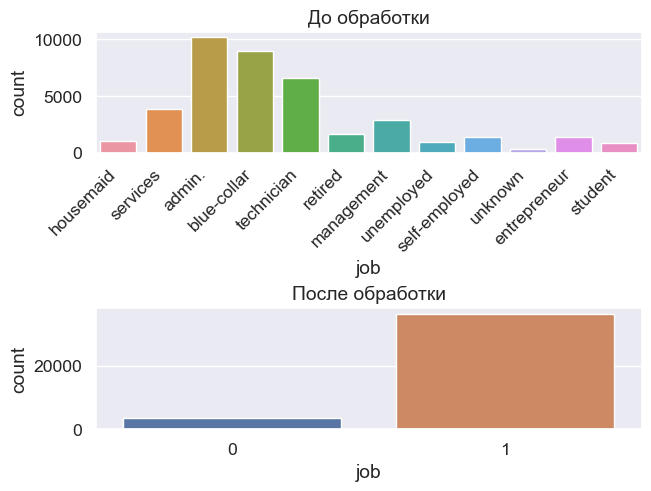

In [669]:
# Бинаризация профессии: 1 - работает, 0 - не работает
df["job"].unique()

fig, axes = plt.subplots(2, constrained_layout=True)

sns.countplot(df, x='job', ax=axes[0]).set_title('До обработки')
axes[0].set_xticks(axes[0].get_xticks(), axes[0].get_xticklabels(), rotation=45, ha='right')

# Удалим значения с job == unknown
df = df.loc[df['job'] != "unknown"]

dict_to_replace = {"housemaid": 1, "services": 1, "admin.": 1, "blue-collar": 1, "technician": 1, "retired": 0, "management": 1, "unemployed": 0, "self-employed": 1, "entrepreneur": 1, "student": 0}
df = df.replace({"job": dict_to_replace})
sns.countplot(df, x='job', ax=axes[1]).set_title('После обработки')



education
university.degree      11821
high.school             9244
basic.9y                5856
professional.course     5100
basic.4y                4002
basic.6y                2204
unknown                 1558
illiterate                18
Name: count, dtype: int64


Text(0.5, 1.0, 'После обработки')

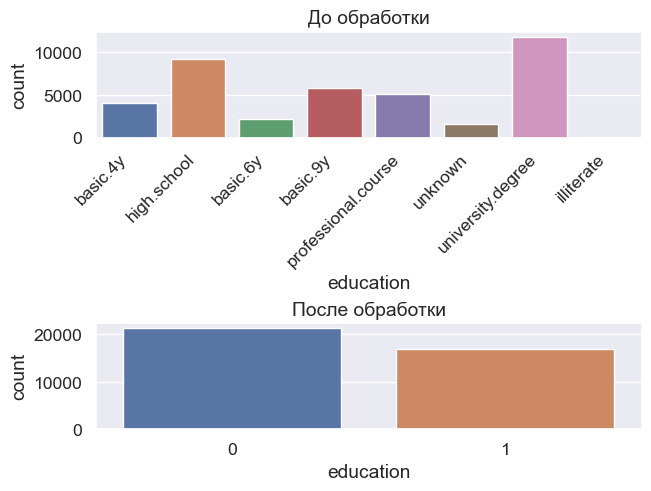

In [670]:
# Перевод образования в числовой формат: 1 - работает, 0 - не работает
df["education"].unique()

fig, axes = plt.subplots(2, constrained_layout=True)

sns.countplot(df, x='education', ax=axes[0]).set_title('До обработки')
axes[0].set_xticks(axes[0].get_xticks(), axes[0].get_xticklabels(), rotation=45, ha='right')
print(df['education'].value_counts())

# Удалим значения с job == unknown
df = df.loc[df['education'] != "unknown"]
df = df.loc[df['education'] != "illiterate"]


dict_to_replace = {"university.degree": 1, "high.school": 0, "basic.9y": 0, "professional.course": 1, "basic.4y": 0, "basic.6y": 0}
df = df.replace({"education": dict_to_replace})
sns.countplot(df, x='education', ax=axes[1]).set_title('После обработки')

default
no         30474
unknown     7750
yes            3
Name: count, dtype: int64


Text(0.5, 1.0, 'После обработки')

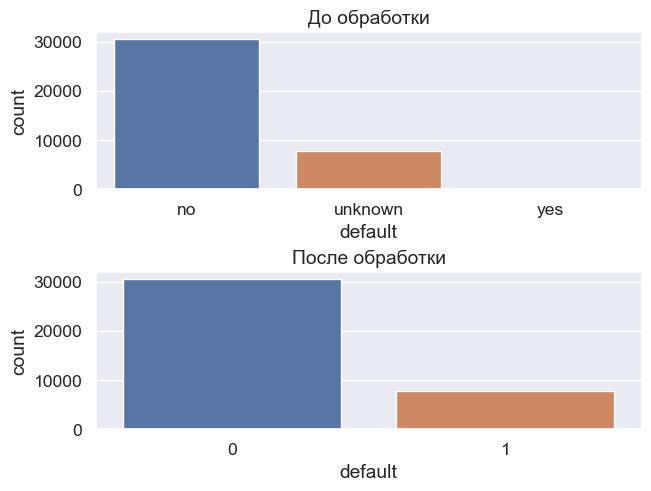

In [671]:
df["default"].unique()
fig, axes = plt.subplots(2, constrained_layout=True)
print(df['default'].value_counts())

sns.countplot(df, x='default', ax=axes[0]).set_title('До обработки')

# Удалим значения с job == unknown
df = df.loc[df['default'] != "yes"]

df['default'] = le.fit_transform(df['default'])
sns.countplot(df, x='default', ax=axes[1]).set_title('После обработки')

In [672]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,1,1,0,0,0,0,1,4.0,0.0,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,1,1,0,1,0,0,1,4.0,0.0,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,1,1,0,0,1,0,1,4.0,0.0,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,1,1,0,0,0,0,1,4.0,0.0,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,1,1,0,0,0,1,1,4.0,0.0,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,0,1,1,0,1,0,0,10.0,4.0,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,1,1,0,0,0,0,10.0,4.0,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,0,1,1,0,1,0,0,10.0,4.0,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,1,1,1,0,0,0,0,10.0,4.0,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1


(array([ 5271, 25715,  7238], dtype=int64), array([ 17,  30,  50, 100]))


Text(0.5, 1.0, 'После обработки')

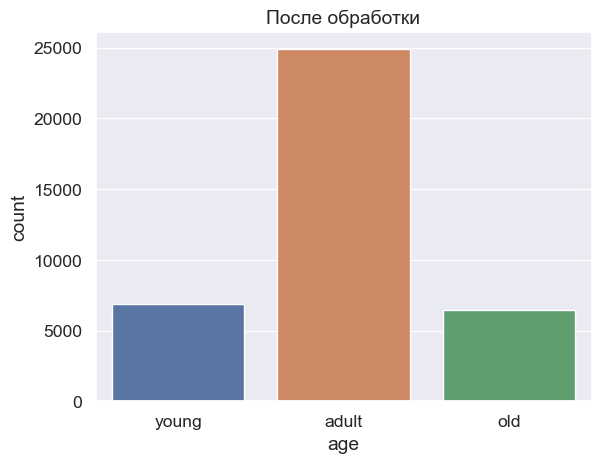

In [673]:
sorted(df["age"].unique())
# print(df['age'].value_counts())

# Узнаем, сколько лежит людей в промежутках: (17-30), (30-50), (50-100) (young, adult, old)
print(np.histogram(df["age"].values, bins=[17,30,50,100]))

cut_labels = ['young', 'adult', 'old']
cut_bins = [17,30,50,100]

df['age'] = pd.cut(df['age'],
                       bins=cut_bins,
                       labels=cut_labels)
df['age'].value_counts()

sns.countplot(df, x='age').set_title('После обработки')





In [674]:
# One Hot Encoding
ohe = OneHotEncoder()
d = ohe.fit_transform(df[['age']])
d = pd.DataFrame(d.toarray(), columns=ohe.categories_[0])
d.drop(d.columns[len(d.columns)-1], axis=1, inplace=True)

# Объединение
df = pd.concat([df, d], axis=1)
df = df.drop('age', axis=1)

In [675]:
# Обработаем pdays: 999 - значит, что не сталкивались с клиентом до этого времени
# print(df['pdays'].value_counts())
# print(print(np.histogram(df["pdays"].values, bins=[0,998,999])))
cut_labels = ['old_client', 'new_client']
cut_bins = [0,998,999]

df['pdays'] = pd.cut(df['pdays'],
                   bins=cut_bins,
                   labels=cut_labels)
print(df['pdays'].value_counts())
df['pdays'] = le.fit_transform(df['pdays'])

pdays
new_client    36859
old_client     1350
Name: count, dtype: int64


In [676]:
df = df.dropna()

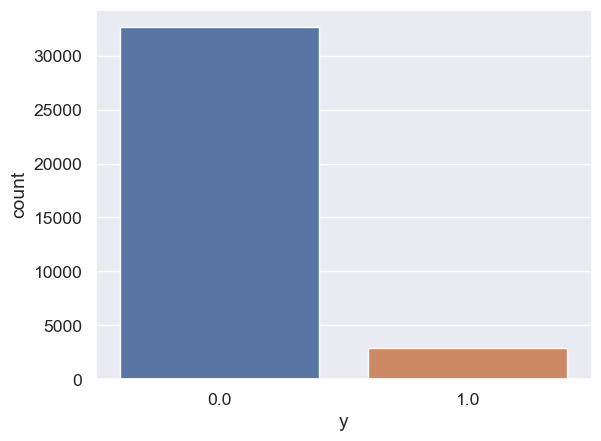

In [677]:
# Датасет является несбалансированным. Исправим это!
sns.countplot(df, x='y')

# Перед тем, как начать балансировать датасет, сделаем копию, чтобы потом на ней проверить обобщающую способность
df_to_test = df.copy()

In [678]:
from random import choices

# Resampling датасета
yes_index = np.array(df[df.y == 1].index)
no_index = np.array(df[df.y == 0].index)

new_no_index = choices(no_index, k=len(yes_index))

df = df.loc[list(np.array(new_no_index)) + list(np.array(yes_index))]

# Перемешаем датасет
df = shuffle(df)


In [679]:
# Разделяем датасет на X, y
X = df.iloc[:, df.columns != 'y']
y = df.iloc[:, df.columns == 'y']

<Axes: xlabel='y', ylabel='count'>

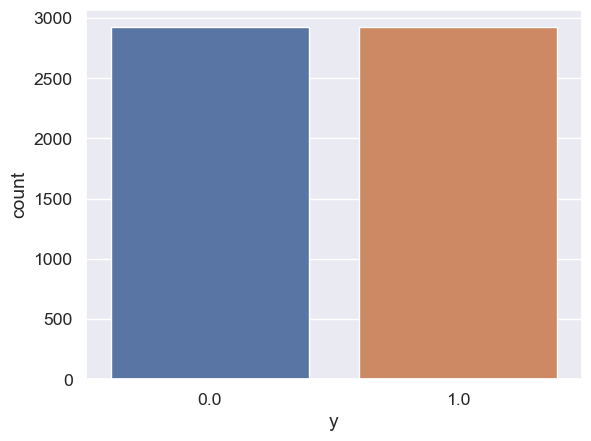

In [680]:
sns.countplot(df, x='y' )

<big>Попробуем несколько разных классификаторов</big>

In [681]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_auc_score, classification_report
from sklearn.model_selection import train_test_split

import xgboost as xgb

In [682]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [683]:
# Логистическая регрессия
lr = LogisticRegression()
lr.fit(X.values, y.values.ravel())
lr_pred = lr.predict(X_test.values)
# print(classification_report(y_test, lr_pred))

# Метод ближайших соседей
kNN = KNeighborsClassifier()
kNN.fit(X.values, y.values.ravel())
kNN_pred = kNN.predict(X_test.values)
# print(classification_report(y_test, kNN_pred))

# Метод опорных векторов
svc = SVC()
svc.fit(X.values, y.values.ravel())
svc_pred = svc.predict(X_test.values)
# print(classification_report(y_test, svc_pred))

# Решающее дерево
d_tree = DecisionTreeClassifier(
    random_state=0,
)
d_tree.fit(X.values, y.values.ravel())
d_tree_pred = d_tree.predict(X_test.values)
# print(classification_report(y_test, d_tree_pred))

# Случайный лес
rf = RandomForestClassifier()
rf.fit(X.values, y.values.ravel())
rf_pred = rf.predict(X_test.values)
# print(classification_report(y_test, rf_pred))

# XGBoost
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
# print(classification_report(y_test, xgb_pred))

In [684]:
print('Метрики теста на сбалансированном датасете:')
print('Logistic Regression Classifier: ', roc_auc_score(y_test, lr_pred))
print('KNears Neighbors Classifier: ', roc_auc_score(y_test, kNN_pred))
print('Support Vector Classifier: ', roc_auc_score(y_test, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_test, d_tree_pred))
print('Random Forest Classifier: ', roc_auc_score(y_test, rf_pred))
print('XGB Classifier: ', roc_auc_score(y_test, xgb_pred))

Метрики теста на сбалансированном датасете:
Logistic Regression Classifier:  0.8410144622625337
KNears Neighbors Classifier:  0.8865655243349385
Support Vector Classifier:  0.7886842146274565
Decision Tree Classifier:  1.0
Random Forest Classifier:  1.0
XGB Classifier:  0.8876875964280706


In [685]:
# Проверка обобщающей способности на тестовом датасете

# Разделяем датасет на X, y
X = df_to_test.iloc[:, df_to_test.columns != 'y']
y = df_to_test.iloc[:, df_to_test.columns == 'y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 42)


lr_pred = lr.predict(X_test.values)
kNN_pred = kNN.predict(X_test.values)
svc_pred = svc.predict(X_test.values)
d_tree_pred = d_tree.predict(X_test.values)
rf_pred = rf.predict(X_test.values)
xgb_pred = xgb_model.predict(X_test)

print('Метрики теста на несбалансированном датасете:')
print('Logistic Regression Classifier: ', roc_auc_score(y_test, lr_pred))
print('KNears Neighbors Classifier: ', roc_auc_score(y_test, kNN_pred))
print('Support Vector Classifier: ', roc_auc_score(y_test, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_test, d_tree_pred))
print('Random Forest Classifier: ', roc_auc_score(y_test, rf_pred))
print('XGB Classifier: ', roc_auc_score(y_test, xgb_pred))

Метрики теста на несбалансированном датасете:
Logistic Regression Classifier:  0.843329841406391
KNears Neighbors Classifier:  0.869801670442705
Support Vector Classifier:  0.8066145173641601
Decision Tree Classifier:  0.9245827196858124
Random Forest Classifier:  0.9315783014236623
XGB Classifier:  0.9129750358608013
